<a href="https://colab.research.google.com/github/shaad4224/yes_Bank_Stock_Closing_Price_Prediction/blob/main/yes_Bank_Stock_Closing_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import numpy as np
import pandas as pd
from numpy import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path='/content/drive/MyDrive/capstone/data_YesBank_StockPrices.csv'
df=pd.read_csv(file_path)

In [ ]:
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [ ]:
df.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


In [ ]:
df.shape

(185, 5)

In [ ]:
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [ ]:
df.nunique()

Date     185
Open     183
High     184
Low      183
Close    185
dtype: int64

In [ ]:
df.isnull().sum().sort_values(ascending=False)

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

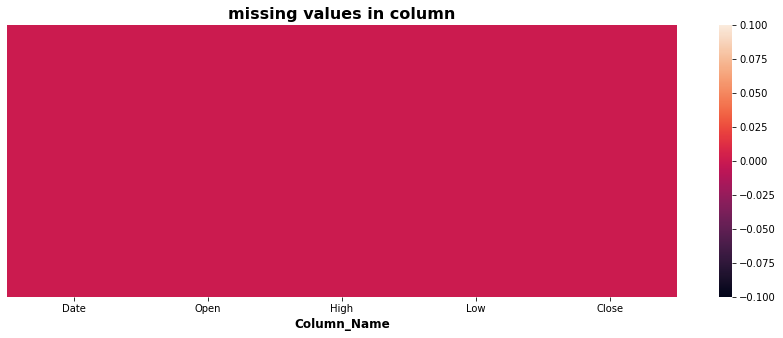

In [ ]:
plt.figure(figsize=(15, 5))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False)
plt.xlabel("Column_Name", size=12, weight="bold")
plt.title("missing values in column",fontweight="bold",size=16)
plt.show()

In [ ]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
180    False
181    False
182    False
183    False
184    False
Length: 185, dtype: bool

In [ ]:
from datetime import datetime

In [ ]:
df['Date'] = df['Date'].apply(lambda x: datetime.strptime(x, '%b-%y'))

In [ ]:
df.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    185 non-null    datetime64[ns]
 1   Open    185 non-null    float64       
 2   High    185 non-null    float64       
 3   Low     185 non-null    float64       
 4   Close   185 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.4 KB


In [ ]:
df.corr()

,Open,High,Low,Close
Open,1.000000,0.993040,0.983978,0.977971
High,0.993040,1.000000,0.983422,0.985051
Low,0.983978,0.983422,1.000000,0.995358
Close,0.977971,0.985051,0.995358,1.000000


<Axes: >

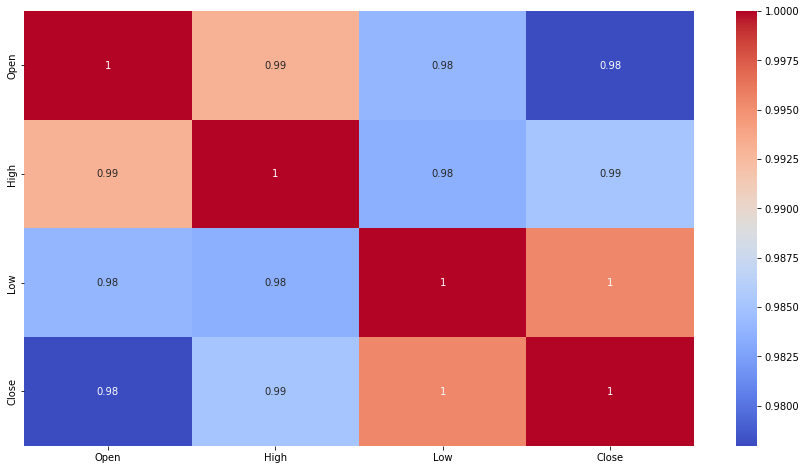

In [ ]:
plt.figure(figsize=(15,8))
correlation=df.corr()
sns.heatmap(abs(correlation),annot=True,cmap='coolwarm')

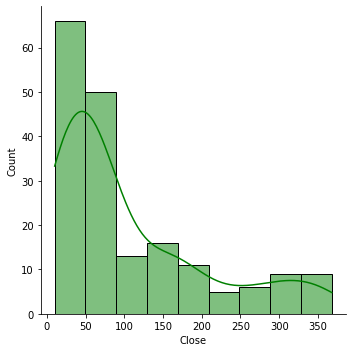

In [27]:
sns.displot(df['Close'],kde=True,color='g')
plt.show()

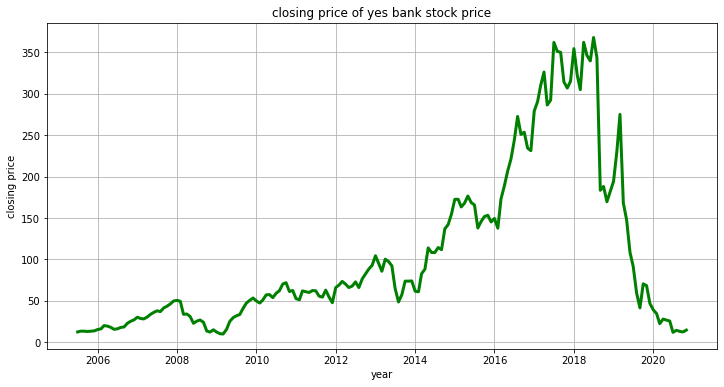

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df['Date'],df['Close'],color='green',linewidth=3)
plt.xlabel('year')
plt.ylabel('closing price')
plt.title('closing price of yes bank stock price')
plt.grid()
plt.show()

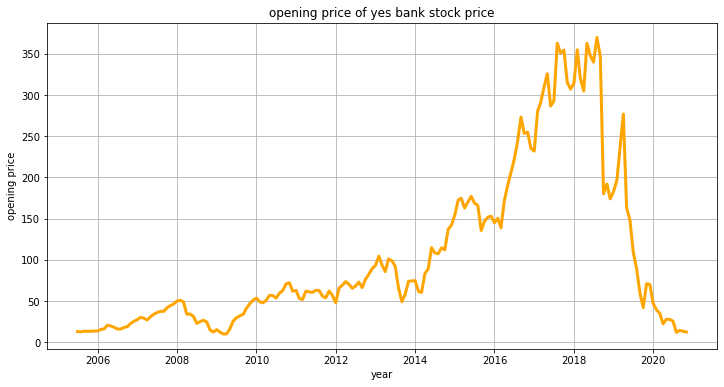

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df['Date'],df['Open'],color='orange',linewidth=3)
plt.xlabel('year')
plt.ylabel('opening price')
plt.title('opening price of yes bank stock price')
plt.grid()
plt.show()

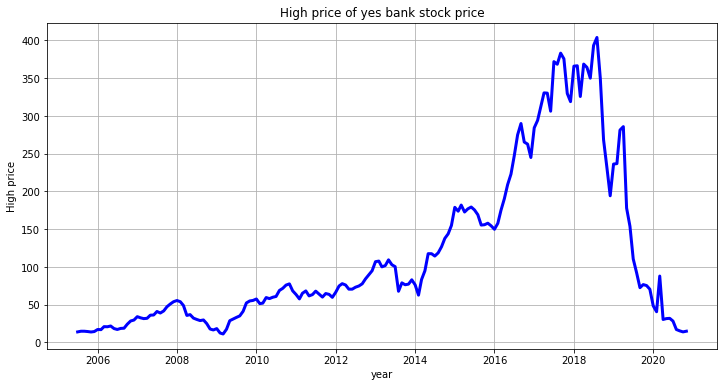

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df['Date'],df['High'],color='blue',linewidth=3)
plt.xlabel('year')
plt.ylabel('High price')
plt.title('High price of yes bank stock price')
plt.grid()
plt.show()

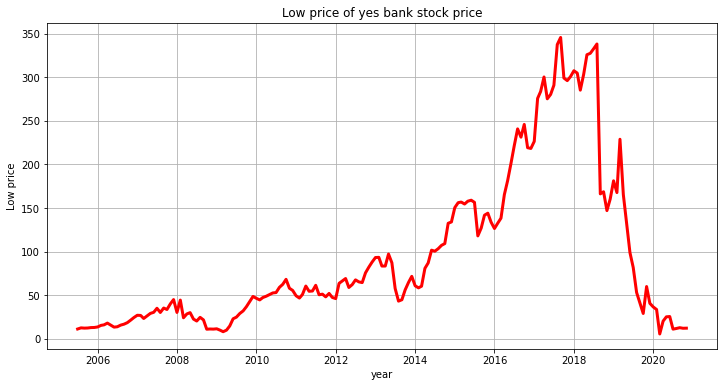

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df['Date'],df['Low'],color='red',linewidth=3)
plt.xlabel('year')
plt.ylabel('Low price')
plt.title('Low price of yes bank stock price')
plt.grid()
plt.show()

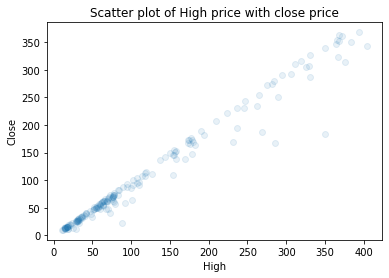

In [28]:
plt.scatter(df['High'],df['Close'],alpha=0.1)
plt.title('Scatter plot of High price with close price')
plt.xlabel('High')
plt.ylabel('Close')
plt.show()

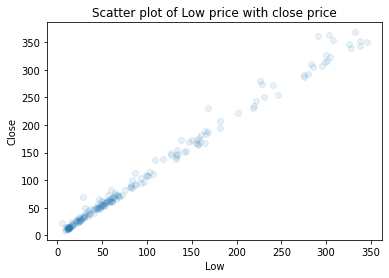

In [29]:
plt.scatter(df['Low'],df['Close'],alpha=0.1)
plt.title('Scatter plot of Low price with close price')
plt.xlabel('Low')
plt.ylabel('Close')
plt.show()

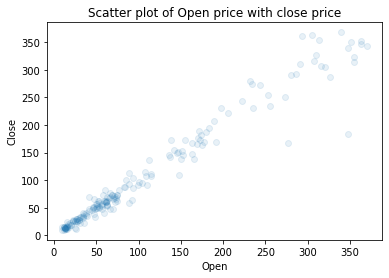

In [31]:
plt.scatter(df['Open'],df['Close'],alpha=0.1)
plt.title('Scatter plot of Open price with close price')
plt.xlabel('Open')
plt.ylabel('Close')
plt.show()